# Notebook de Exemplos: Interpolação de Pontos na Reta Real

Este notebook demonstra o uso das seguintes funções de interpolação:

1.  `lin_interp`: Realiza a interpolação linear por partes entre os pontos.

2.  `poly_interp`: Calcula o polinômio interpolador (Interpolação Polinomial) pelo Método de Lagrange.

3.  `hermite_interp`: Calcula o polinômio interpolador de Hermite (usando valores e derivadas).

4.  `vandermond_interp` (extra): Calcula o polinômio interpolador pelo Método de Vandermonde.

Todas as funções também demonstram a representação gráfica dos pontos e do polinômio/função interpoladora.

# Código - Interpolação Linear

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

def _ordenar_coordenadas(x: list, y: list) -> list:
    """Ordena as coordenadas mantendo 'pareamento'.
    
    Pega as coordenadas x e y de cada ponto, ordena em ordem crescente
    as coordenadas x e mantém pareamento com y. Função privada, auxiliar
    da função principal lin_interp.

    Args:
        x: lista das coordenadas x, em x[i], de cada ponto i.
        y: lista das coordenadas y, em y[i], de cada ponto i.

    Returns:
        x_ord: lista das coordenadas x em ordem crescente.
        y_ord: lista das coordenadas y, pareadas com as coordenadas x.
    """
    
    x_np = np.array(x)
    y_np = np.array(y)

    idx = np.argsort(x_np)

    x_ord = x_np[idx]
    y_ord = y_np[idx]

    return x_ord, y_ord

def _plotar(x: list,
            y: list,
            f: Callable,
            titulo: str = 'Gráfico'):
    """Plotagem de pontos e de uma função.

    Plotagem dos pontos indicados pelas coordenadas x e y, seguindo a
    função f. Função privada, auxiliar da função principal lin_interp.

    Args:
        x: lista das coordenadas x, em x[i], de cada ponto i.
        y: lista das coordenadas y, em y[i], de cada ponto i.
        f: função que será plotada.

    Returns:
        None
    Raises:
    """
    
    x_points = np.linspace(x[0], x[-1], 500)
    y_points = [f(xp) for xp in x_points]

    _, ax = plt.subplots()
    ax.scatter(x, y, color = 'red', label = 'Dados')
    ax.plot(x_points, y_points,'b-', linewidth=2, label = 'Interpolação Linear por Partes')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(titulo)
    ax.grid(True)
    plt.show()

    return

def lin_interp(x: list,
               y: list,
               plot: bool = False
               ) -> Callable:
    """Interpolação linear por partes a partir dos pontos dados.

    Essa função ordena pontos a partir da ordem crescente das
    coordenadas x. Em seguida, cria retas descritas pela nova
    função f, que 'ligam' os pontos descritos pelas coordenadas x e y.
    É permitida extrapolação. Por fim, caso 'plot = True', há uma
    plotagem do gráfico correspondente.

    Args:
        x: lista das coordenadas x, em x[i], de cada ponto i.
        y: lista das coordenadas y, em y[i], de cada ponto i.
        plot: indica se deve haver a plotagem (True) ou não (False).

    Returns:
        f: função de interpolação linear por partes
    Raises:
        ValueError: Caso 'x' e 'y' tenham tamanhos diferentes, caso as listas
        estejam vazias, ou caso as coordenadas em 'x' não sejam distintas.
        TypeError: caso 'x' ou 'y' não sejam listas, ou caso 'plot não seja bool'.
    """
    # Tratamento de erros
    try:
        n = len(x)
        m = len(y)
    except:
        raise TypeError("Os argumentos 'x' e 'y' devem ser listas.")
    if plot is not bool:
        raise TypeError("O argumento 'plot' deve ser bool")
    
    if n != m:
        raise ValueError("As listas de coordenadas x e y devem ter o mesmo tamanho.")
    if n == 0:
        raise ValueError("As listas x e y não podem estar vazias.")
    if len(set(x)) != n:
        raise ValueError("As coordenadas x devem ser todas distintas.")

    # Ordenação das coordenadas x em ordem crescente
    x, y = _ordenar_coordenadas(x, y)

    # Definição da função de interpolação
    def f(x1: float) -> float:
        if x1 < x[0]: # Caso fora do intervalo, continua a reta mais próxima
            a = (y[1] - y[0])/(x[1] - x[0])
            b = y[0]
                    
            y1 = b + (x1 - x[0]) * a 
            return y1
        elif x1 > x[-1]: # Caso fora do intervalo, continua a reta mais próxima
            a = (y[-1] - y[-2])/(x[-1] - x[-2])
            b = y[-2]
                    
            y1 = b + (x1 - x[-2]) * a
            return y1
        else:
            for i in range (1, len(x)): # Busca intervalo do número x1 para atribuir valor f(x1)
                if x[i] >= x1 >= x[i-1]:
                    a = (y[i] - y[i-1])/(x[i] - x[i-1])
                    b = y[i-1]
                    
                    y1 = b + (x1 - x[i-1]) * a # Aproximação linear
                    
                    return y1

    # Plotagem do gráfico correspondente à função f
    if plot:
        _plotar(x, y, f, 'Interpolação Linear por Partes')

    return f

# Exemplos - Interpolação Linear

In [9]:
print('Exemplo 1')

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [34, 12, 60, 35, 7, 23, 6, 50, 10, 4, 21]

print('\nSegue abaixo as coordenadas x e y dos pontos do exemplo 1')
print(x)
print(y)

p = lin_interp(x, y, plot = True)

teste = [1.5, 2.8, 3.9, 5.7, 9.1, 11.1, 15]
if p:
    for num in teste:
        print(f'O valor interpolado em {num} é p(num)={round(p(num),2)}')

print('\nNote que extrapolação é permitida')

print('\n--------------\n')
print('Exemplo 2')
print('\nPerceba que, mesmo ao mudar a ordem das coordenadas, o gráfico continua o mesmo')
x1 = [0, 1, 10, 2, 4, 7, 5, 6, 8, 9, 3]
y1 = [34, 12, 21, 60, 7, 50, 23, 6, 10, 4, 35]
print('\nSegue abaixo as coordenadas x e y dos pontos do exemplo 2')
print(x1)
print(y1)

f = lin_interp(x1, y1, plot = True)

Exemplo 1

Segue abaixo as coordenadas x e y dos pontos do exemplo 1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[34, 12, 60, 35, 7, 23, 6, 50, 10, 4, 21]


TypeError: O argumento 'plot' deve ser bool

# Código - Vandermonde

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

def _ordenar_coordenadas(x: list, y: list) -> list:
    """Ordena as coordenadas mantendo 'pareamento'.
    
    Pega as coordenadas x e y de cada ponto, ordena em ordem crescente
    as coordenadas x e mantém pareamento com y. Função privada, auxiliar
    da função principal lin_interp.

    Args:
        x: lista das coordenadas x, em x[i], de cada ponto i.
        y: lista das coordenadas y, em y[i], de cada ponto i.

    Returns:
        x_ord: lista das coordenadas x em ordem crescente.
        y_ord: lista das coordenadas y, pareadas com as coordenadas x.
    """
    
    x_np = np.array(x)
    y_np = np.array(y)

    idx = np.argsort(x_np)

    x_ord = x_np[idx]
    y_ord = y_np[idx]

    return x_ord, y_ord

def _random_sample(intv: list, N: int) -> np.array:
    """Cria uma amostra aleatória.
    
    Args:
        intv: intervalo da amostra.
        N: número de amostras.

    Returns:
        Lista numpy.array das amostras.
    """
    r = np.random.uniform(intv[0], intv[1], N-2)
    r.sort()
    return np.array([intv[0]] + list(r) + [intv[1]])

def _error_pol(f: Callable,
               P: Callable,
               intv: list,
               n: int = 1000) -> np.array:
    """Calcula o erro médio e o erro máximo
    
    Args:
        f: função analisada.
        P: função idealizada.
        intv: intervalo analisado.
        n = quantidade de amostras.

    Reuturns:
        Erro médio.
        Erro máximo.
    """
    x = _random_sample(intv, n)
    error = np.abs(f(x)-P(x))
    return np.sum(error)/n, np.max(error)

def _plotar(x: list,
            y: list,
            f: Callable,
            titulo: str = 'Gráfico',
            f_ideal: Callable = None):
    """Plotagem de pontos e de uma função.

    Plotagem dos pontos indicados pelas coordenadas x e y, seguindo a
    função f. Caso haja uma função ideal, ela também é plotada, e seu
    erro é calculado. O erro é mostrado no título do gráfico principal,
    e um gráfico secundário é plotado, mostrando o erro absoluto. Função
    privada, auxiliar da função principal lin_interp.

    Args:
        x: lista das coordenadas x, em x[i], de cada ponto i.
        y: lista das coordenadas y, em y[i], de cada ponto i.
        f: função que será plotada.
        titulo: titulo do gráfico que será plotado.
        f_ideal: função ideal (caso tenha).

    Returns:
        None
    """
    
    # Conversão para numpy.array
    x_points = np.linspace(x[0], x[-1], 500)
    y_points = np.array([f(xp) for xp in x_points])

    if f_ideal: # Caso exista uma função ideal, o erro médio é calculado e mostrado na plotagem
        _, (ax, ax_err) = plt.subplots(
            2, 1, 
            figsize=(10, 10), 
            sharex=True # Compartilha o eixo x
        )
        
        y_ideal = np.array([f_ideal(xp) for xp in x_points]) # Pontos da função ideal

        # Calcuando erros médio e máximo
        intv = [x[0], x[-1]]
        erroMedio, erroMax = _error_pol(f, f_ideal, intv, n= 1000)
        ax.set_title(titulo+f' - Erro Médio = {erroMedio:2.4f} - Erro Máximo = {erroMax:2.4f}')
        
        # Plotando a função ideal 
        ax.plot(x_points, y_ideal, color = 'k', label = 'Função ideal')
        
        # Calculando e plotando o erro absoluto em gráfico anexo ao original
        erro_absoluto = np.abs(y_ideal - y_points)
        ax_err.plot(x_points, erro_absoluto, 'r-', label='Erro Absoluto |Real - Interp.|')
        ax_err.set_xlabel('x')
        ax_err.set_ylabel('Erro Absoluto')
        ax_err.set_title('Gráfico de Erro')
        ax_err.grid(True, alpha=0.3)
        ax_err.legend()
    else:
        # Criando área de plotagem normal, sem gráfico de erro anexo
        _, ax = plt.subplots()
        ax.set_title(titulo)
    
    ax.scatter(x, y, color = 'red', label = 'Dados')
    ax.plot(x_points, y_points, color = 'b-',
            linewidth=2, label = 'Interpolação Polinomial (Vandermonde)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.show()

    return

def vandermond_interp(x: list,
                      y: list,
                      plot: bool = False,
                      f_ideal: Callable = None) -> Callable:
    """Interpolação polinomial pelo método de Vandermonde

    Essa função ordena pontos a partir da ordem crescente das
    coordenadas x. Em seguida, cria matriz de Vandermonde e retorna
    a solução algébrica para, assim, conseguir os coeficientes do
    polinômio interpolado. Caso haja uma função ideal, também é calculado
    o erro, que é representado no plot. Por fim, caso 'plot = True', há uma
    plotagem do gráfico correspondente. Por padrão, 'plot = False',
    ou seja, por padrão não há a plotagem.

    Args:
        x: lista das coordenadas x, em x[i], de cada ponto i.
        y: lista das coordenadas y, em y[i], de cada ponto i.
        plot: indica se deve haver a plotagem (True) ou não (False).
        f_ideal: função ideal, caso queira fazer comparação de erros.

    Returns:
        f: função de interpolação linear por partes.

    Raises:
        ValueError: Caso 'x' e 'y' tenham tamanhos diferentes, caso as listas
        estejam vazias, ou caso as coordenadas em 'x' não sejam distintas.
        TypeError: caso 'x' ou 'y' não sejam listas, caso 'f_ideal' não seja
        callable, ou caso 'plot não seja bool'.
    """
    # Tratamento de erros
    try:
        n = len(x)
        m = len(y)
    except:
        raise TypeError("Os argumentos 'x' e 'y' devem ser listas.")

    if f_ideal is not None and not callable(f_ideal):
        raise TypeError("O argumento 'f_ideal' deve ser uma função (callable).")
    if plot is not bool:
        raise TypeError("O argumento 'plot' deve ser bool")
    
    if n != m:
        raise ValueError("As listas de coordenadas x e y devem ter o mesmo tamanho.")
    if n == 0:
        raise ValueError("As listas x e y não podem estar vazias.")
    if len(set(x)) != n:
        raise ValueError("As coordenadas x devem ser todas distintas.")
    
    # Ordenação das coordenadas x em ordem crescente
    x, y = _ordenar_coordenadas(x, y)
    
    n = len(x)
    matrix_vandermond = np.ones([n, n]) # Criação da matriz de Vandermonde com uns
    for i in range(n): # Eleva cada elemento da matriz ao seu devido expoente
        for k in range(1, n):
            matrix_vandermond[i][k] = matrix_vandermond[i][k-1] * x[i]
    
    coef = np.linalg.solve(matrix_vandermond, y)
    
    # Definição da função de interpolação
    def f(x1: float) -> float:
        y1 = 0
        for a in coef[::-1]: # Método de Horner para calcular valores de polinômios
            y1 = a + y1*x1

        return y1

    # Plotagem do gráfico correspondente à função f
    if plot:
        if f_ideal: # Caso exista uma função ideal, o erro é "plotado" no título
            _plotar(x, y, f, 'Interpolação Polinomial (Vandermonde)', f_ideal= f_ideal)
        else:
            _plotar(x, y, f, 'Interpolação Polinomial (Vandermonde)')

    return f

# Exemplos - Vandermonde

In [10]:
print('EXEMPLO 1: Função padrão do documento Trabalho_de_Grupo_cb23_2025.pdf')

x = [0, 1, 2, 3]
y = [1, 2, 0, 4]
print('\nSegue abaixo as coordenadas x e y dos pontos do exemplo 1')
print(x)
print(y)

p = vandermond_interp(x, y, plot= True)

teste = [1.5, 2.8, 3.9, 5.7, 9.1, 11.1, 15]

print("x\tP(x)")
print("-" * 14)
for num in teste:
    print(f"{num:.2f}\t{p(num):.4f}")

print('\nNote que extrapolação é permitida')

print('\nPerceba que, mesmo ao mudar a ordem das coordenadas, o gráfico continua o mesmo')
x1 = [3, 0, 2, 1]
y1 = [4, 1, 0, 2]
print('\nSegue abaixo as coordenadas x e y dos pontos do exemplo 2')
print(x1)
print(y1)

f = vandermond_interp(x1, y1, plot = True)


EXEMPLO 1: Função padrão do documento Trabalho_de_Grupo_cb23_2025.pdf

Segue abaixo as coordenadas x e y dos pontos do exemplo 1
[0, 1, 2, 3]
[1, 2, 0, 4]


TypeError: O argumento 'plot' deve ser bool

EXEMPLO 2: Função sen(x)
[-6.283185307179586, -3.141592653589793, -1.5707963267948966, 0, 1.5707963267948966, 3.141592653589793, 6.283185307179586]
[0, 0, -1, 0, 1, 0, 0]


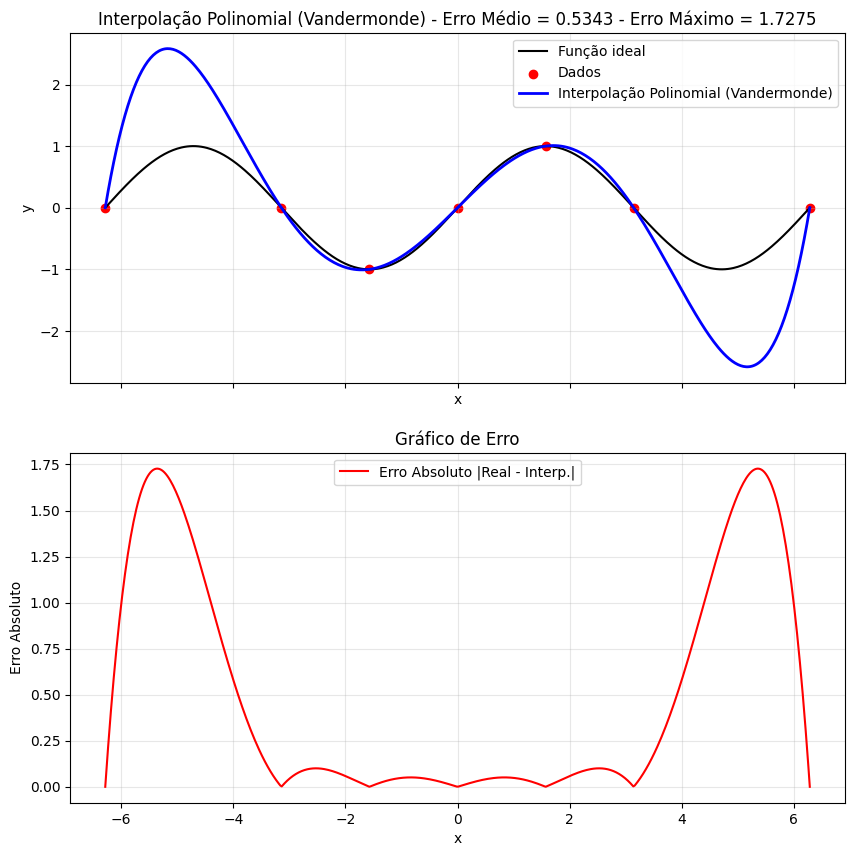

         x |         P(x) |       sen(x) |         erro
-------------------------------------------------------
   -6.2832 |     0.000000 |     0.000000 | 1.881140e-15
   -3.1416 |     0.000000 |    -0.000000 | 1.558126e-16
   -1.5708 |    -1.000000 |    -1.000000 | 2.553513e-15
    0.0000 |     0.000000 |     0.000000 | 2.823643e-15
    1.5708 |     1.000000 |     1.000000 | 3.108624e-15
    3.1416 |     0.000000 |     0.000000 | 7.584194e-15
    6.2832 |     0.000000 |    -0.000000 | 7.254014e-15


In [ ]:
print('EXEMPLO 2: Função sen(x)')

f_ideal = lambda x : np.sin(x)
x2 = [-2*np.pi, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 2*np.pi]
y2 = [0, 0, -1, 0, 1, 0, 0]
print(x2)
print(y2)

g = vandermond_interp(x2, y2, plot = True, f_ideal=f_ideal)

if g:
    print(f"{'x':>10} | {'P(x)':>12} | {'sen(x)':>12} | {'erro':>12}")
    print("-" * 55)

    for x in x2:
        interp = g(x)
        real = f_ideal(x)
        erro = abs(interp - real)
        print(f"{x:10.4f} | {interp:12.6f} | {real:12.6f} | {erro:12.6e}")

# Código - Interpolação Polinomial

In [ ]:
def _poly_interp_plotter(x_val: list,
                         y_val: list,
                         P: Callable,
                         res: int,
                         pcolor: str,
                         ccolor: str,
                         titulo: str) -> None:
    """
    Plotar gráfico da interpolação polinomial.

    Parameters
    ----------
        x_val : list
            lista das coordenadas x.
        y_val : list
            lista das coordenadas y.
        P : Callable
            função que corresponde ao polinômio interpolador.
        res : int = 100, optional
            número de pontos para a plotagem do polinômio.
        pcolor : str = "#234883", optional
            cor dos pontos originais.
        ccolor : str = "#4287f5", optional
            cor do polinômio.

    Returns
    -------
        None
    """

    # pontos recebidos
    plt.scatter(x_val, y_val, color=pcolor, label='Pontos Originais', zorder=5)

    # gerando e plotando os pontos do polinômio
    x_plot = np.linspace(min(x_val), max(x_val), res)
    y_plot = [P(x) for x in x_plot]
    plt.plot(x_plot, y_plot, color=ccolor, label='Interpolação Polinomial', linewidth=2)

    plt.title(titulo)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    return


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable


def poly_interp(x_val: list,
                y_val: list,
                plot: bool = False,
                res: int = 100,
                pcolor: str = "#234883",
                ccolor: str = "#4287f5",
                titulo: str = "Interpolação Polinomial de Lagrange") -> Callable:
    """
    Gera um polinômio interpolador usando o método de Lagrange.

    Esta função recebe um conjunto de pontos (x, y) e retorna uma 
    função (polinômio) que passa exatamente por todos esses pontos.

    Parameters
    ----------
    x_val : list
        Uma lista de coordenadas x dos pontos. Os valores devem ser
        todos distintos entre si.
    y_val : list
        Uma lista de coordenadas y dos pontos. Deve ter o mesmo
        tamanho de `x_val`.
    plot : bool, optional
        Se True, exibe um gráfico do polinômio e dos pontos 
        originais. O padrão é False.
    res : int, optional
        Resolução (número de pontos) usada para desenhar a 
        curva do polinômio no gráfico. O padrão é 100.
    pcolor : str, optional
        Cor dos pontos originais no gráfico. O padrão é "#234883".
    ccolor : str, optional
        Cor da curva do polinômio no gráfico. O padrão é "#4287f5".
    titulo : str, optional
        Título do gráfico. O padrão é "Interpolação Polinomial de Lagrange".

    Returns
    -------
    Callable
        Uma função P(x) que recebe um número (int ou float) e 
        retorna o valor do polinômio interpolador avaliado 
        naquele ponto x.

    Raises
    ------
    ValueError
        - Se `x_val` e `y_val` tiverem tamanhos diferentes.
        - Se as listas de entrada estiverem vazias.
        - Se `x_val` contiver valores duplicados.
        - Se `res` não for um inteiro.
        - Se `pcolor` ou `ccolor` não forem strings.
        - Se `titulo` não for uma string.

    Examples
    --------
    >>> x = [0, 1, 2]
    >>> y = [1, 3, 2]
    >>> pol = poly_interp(x, y)
    >>> print(pol(1.5))
    2.625
    """

    # tratamento de erros
    n = len(x_val)
    m = len(y_val)

    if n != m:
        raise ValueError("As listas de coordenadas x e y devem ter o mesmo tamanho.")

    if n == 0:
        raise ValueError("Lista de pontos x inserida está vazia.")
    elif m == 0:
        raise ValueError("Lista de pontos y inserida está vazia.")
    
    if len(set(x_val)) != n:
        raise ValueError("As coordenadas x devem ser todas distintas.")
    
    if not (type(res) == int):
        raise ValueError("O argumento res deve ser um inteiro.")
    
    if not (type(pcolor) == str):
        raise ValueError("O argumento pcolor deve ser uma string.")
    
    if not (type(ccolor) == str):
        raise ValueError("O argumento ccolor deve ser uma string.")
    
    if not (type(titulo) == str):
        raise ValueError("O argumento titulo deve ser uma string.")
    

    
    # convertendo as arrays para o tipo do numpy
    x_val_np = np.array(x_val)
    y_val_np = np.array(y_val)


    def P(x: int | float) -> int | float:
        """
        Função que calcula o valor do polinômio interpolador em x.

        Parameters
        ----------
        x : int | float
            Ponto onde o polinômio será avaliado.

        Returns
        -------
        int | float
            O valor do polinômio interpolador em x.

        Raises
        ------
        ValueError
            Se x não for um número (int ou float).
        """

        if not np.isreal(x):
            raise ValueError("O argumento x deve ser um número real.")

        # acumula o termo y_j * L_j(x)
        acc_som = 0

        # loop do somatório
        for j in range(n):          
            # o produtorio exije que j != i
            x_val_sj = np.delete(x_val_np, j)

            # calculando numeradores e denominadores do produtorio
            num = x - x_val_sj
            den = x_val_np[j] - x_val_sj

            acc_som += y_val_np[j] * np.prod(num / den)
        
        return acc_som
    
    # plotagem do grafico caso o usuario deseje
    if plot:
        _poly_interp_plotter(x_val, y_val, P, res, pcolor, ccolor, titulo)

    return P

Exemplo 1
Pontos: [(0, 0), (1, 3), (3, -2), (4, 0)]


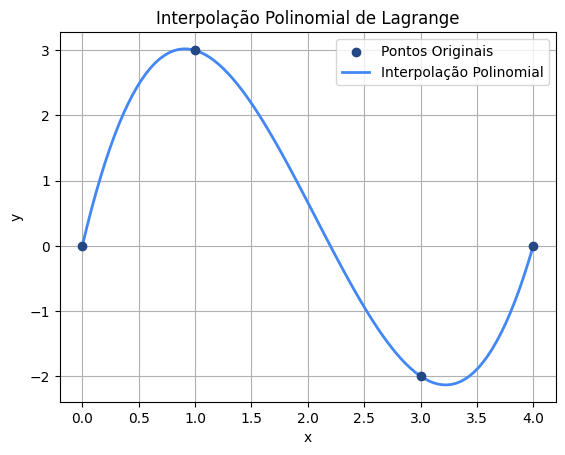

O valor interpolado em x = 10 é P(x) = 390.00
O valor interpolado em x = 13.98 é P(x) = 1369.63
O valor interpolado em x = 26.384 é P(x) = 11902.14
O valor interpolado em x = 49 é P(x) = 85995.00

----------------------------------------

Exemplo 2
Pontos: [(0, 0), (1, 2), (2, 1), (3, 0), (4, 1), (5, 2), (6, 0)]


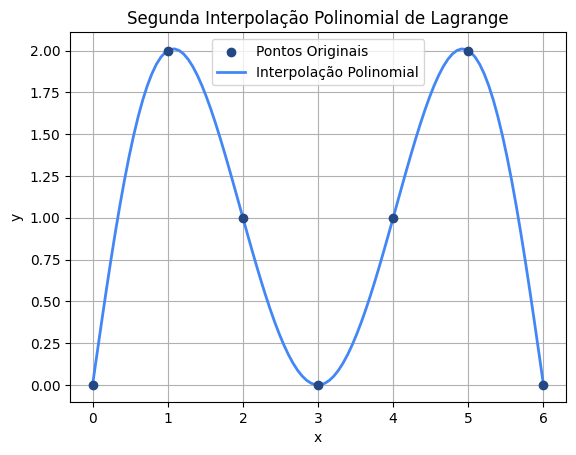

O valor interpolado em x = 10 é P(x) = 539.00
O valor interpolado em x = 13.98 é P(x) = 11719.27
O valor interpolado em x = 26.384 é P(x) = 1300848.42
O valor interpolado em x = 49 é P(x) = 78022210.00


In [ ]:
# testes

print("Exemplo 1")

x = [0, 1, 3, 4]
y = [0, 3, -2, 0]

print(f"Pontos: {[(x_val, y_val) for x_val, y_val in zip(x, y)]}")

p = poly_interp(x, y, plot=True)

pontos_exemplo1 = [10, 13.98, 26.384, 49]

for num in pontos_exemplo1:
    print(f"O valor interpolado em x = {num} é P(x) = {p(num):.2f}")

print('\n', '-'*40, '\n', sep='')
print("Exemplo 2")

x = [0, 1, 2, 3, 4, 5, 6]
y = [0, 2, 1, 0, 1, 2, 0]

print(f"Pontos: {[(x_val, y_val) for x_val, y_val in zip(x, y)]}")

p = poly_interp(x, y, plot=True, titulo="Segunda Interpolação Polinomial de Lagrange")

pontos_exemplo2 = [29.643, 18.57, 47.15, 93.6, 45.3, 25.332, 2.1]

for num in pontos_exemplo1:
    print(f"O valor interpolado em x = {num} é P(x) = {p(num):.2f}")



# Código - Hermite

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable


def _hermite_interp_mat(x_pontos: list, y_pontos: list, dy_pontos: list) -> Callable | None:
    """
    Função interna - Cria a função matemática da interpolação.

    Essa função apenas resolve o sistema linear e 
    retorna a função polinomial (Callable) que pode ser usada 
    para calcular valores.

    Parâmetros:
        x_pontos: Coordenadas x (n valores).
        y_pontos: Coordenadas y (n valores).
        dy_pontos: Derivadas dy/dx em cada x (n valores)."

    Retorna:
        Uma função (Callable) que avalia o polinômio, ou None se der erro.
    """
    try:
        x_pts = np.asarray(x_pontos, dtype=float)
        y_pts = np.asarray(y_pontos, dtype=float)
        dy_pts = np.asarray(dy_pontos, dtype=float)
    except Exception as e:
        print(f"Erro ao converter entradas para arrays numpy: {e}")
        return None

    n = len(x_pts)
    if n == 0:
        print("Erro: As listas de pontos não podem estar vazias.")
        return None
    if len(y_pts) != n or len(dy_pts) != n:
        print("Erro: As listas x, y, e dy devem ter o mesmo tamanho.")
        return None

    num_coefs = 2 * n

    # valores min/max não são necessários pra checagem, mas podem ser úteis se quiser saber o intervalo
    x_min = np.min(x_pts)
    x_max = np.max(x_pts)

    A = np.zeros((num_coefs, num_coefs))
    b = np.zeros(num_coefs)

    for i in range(n):
        x = x_pts[i]

        A[2*i] = [x**j for j in range(num_coefs)]
        b[2*i] = y_pts[i]

        linha_dy = [0.0] + [j * x**(j-1) for j in range(1, num_coefs)]
        A[2*i + 1] = linha_dy
        b[2*i + 1] = dy_pts[i]

    try:
        coefs = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        print("Erro: Matriz singular. Verifique se há pontos x duplicados.")
        return None

    def polinomio_interpolador_hermite(x_novo: float | np.ndarray) -> float | np.ndarray:
        """
        Avalia o polinômio P(x_novo) = sum(c_j * x_novo^j)
        """
        x_val = np.asarray(x_novo, dtype=float)

        return np.polyval(coefs[::-1], x_val)

    return polinomio_interpolador_hermite


def _ordenar_coordenadas_hermite(x: list, y: list, dy: list) -> tuple:
    """
    Função interna - Ordena as coordenadas mantendo 'pareamento' para Hermite.

    Parâmetros:
    x: lista das coordenadas x, em x[i], de cada ponto i.
    y: lista das coordenadas y, em y[i], de cada ponto i.
    dy: lista das derivadas dy[i] em cada ponto i.

    Retorna:
    x_ord: lista das coordenadas x em ordem crescente.
    y_ord: lista das coordenadas y, pareadas com as coordenadas x.
    dy_ord: lista das derivadas, pareadas com as coordenadas x.
    """
    x_np = np.array(x)
    y_np = np.array(y)
    dy_np = np.array(dy)

    idx = np.argsort(x_np)

    x_ord = x_np[idx]
    y_ord = y_np[idx]
    dy_ord = dy_np[idx]

    return x_ord, y_ord, dy_ord


def _plotar_hermite(x: list, y: list, dy: list, f: Callable, 
                    f_real: Callable | None = None,  
                    titulo: str = "Interpolação de Hermite"):
    """
    Função interna - Plotagem de pontos, derivadas e da função de interpolação.

    Parâmetros:
    x: lista das coordenadas x, em x[i], de cada ponto i.
    y: lista das coordenadas y, em y[i], de cada ponto i.
    dy: lista das derivadas dy[i] em cada ponto i.
    f: função de interpolação que será plotada.
    f_real: (Opcional) a função verdadeira para cálculo do erro.
    titulo: título do gráfico.

    Retorna:
    None
    """
    # criar pontos para a curva suave
    x_min, x_max = min(x), max(x)
    padding = 0.1 * (x_max - x_min)
    x_curve = np.linspace(x_min - padding, x_max + padding, 500)
    y_curve = f(x_curve)

    if f_real:
        y_real_curve = f_real(x_curve)
        erro_absoluto = np.abs(y_real_curve - y_curve)
        erro_medio = np.mean(erro_absoluto)
        erro_maximo = np.max(erro_absoluto)
    else:
        y_real_curve = None
        erro_absoluto = None
        erro_medio = erro_maximo = None

    # Cria dois subgráficos: função e erro
    fig, (ax, ax_err) = plt.subplots(
        2, 1, 
        figsize=(10, 8), 
        gridspec_kw={'height_ratios': [2, 1]},
        sharex=True
    )

    # Gráfico principal
    if f_real:
        ax.plot(x_curve, y_real_curve, 'k-', linewidth=2, label='Função ideal')
    ax.scatter(x, y, color='red', s=50, label='Dados')
    ax.plot(x_curve, y_curve, 'b-', linewidth=2, label='Interpolação Polinomial (Hermite)')

    ax.set_ylabel('y')
    if erro_medio is not None:
        ax.set_title(f"Interpolação Polinomial (Hermite) - Erro Médio = {erro_medio:.4f} - Erro Máximo = {erro_maximo:.4f}")
    else:
        ax.set_title(titulo)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # calcular as retas tangentes nos pontos de interpolação
    comprimento_tangente = 0.1 * \
        (x_max - x_min) if (x_max - x_min) > 0 else 0.1
    
    # adc retas tangentes
    tangente_plotted = False
    for xi, yi, dyi in zip(x, y, dy):
        x_tang = [xi - comprimento_tangente, xi + comprimento_tangente]
        y_tang = [yi - comprimento_tangente *
                  dyi, yi + comprimento_tangente * dyi]
        label = 'Tangente' if not tangente_plotted else ""
        ax.plot(x_tang, y_tang, 'g--', alpha=0.7, linewidth=1, label=label)
        if not tangente_plotted:
            tangente_plotted = True
        ax.plot(xi, yi, 'ro', markersize=8)


    # Gráfico de erro
    if f_real:
        ax_err.plot(x_curve, erro_absoluto, 'r-', label='Erro Absoluto |Real - Interp.|')
        ax_err.set_xlabel('x')
        ax_err.set_ylabel('Erro')
        ax_err.set_title('Gráfico de Erro')
        ax_err.legend()
        ax_err.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def hermite_interp(x_pontos: list, y_pontos: list, dy_pontos: list,
                   f_real: Callable | None = None,
                   titulo: str = "Interpolação de Hermite",
                   plot: bool = False) -> Callable:
    """
    Cria e plota uma função de interpolação polinomial de Hermite.

    Parâmetros:
        x_pontos: Coordenadas x (n valores).
        y_pontos: Coordenadas y (n valores).
        dy_pontos: Derivadas dy/dx em cada x (n valores).
        f_real: (Opcional) A função 'verdadeira' para plotar junto e calcular o gráfico de erro.
        titulo: Título para o gráfico.
        plot: indica se deve haver a plotagem (True) ou não (False).

    Retorna:
        Função de interpolação de Hermite.
        Se f_real for fornecida, imprime o erro médio e máximo

    Notas:
        Sobre a Extrapolação:
        Esta função sempre permite a extrapolação (avaliar valores de x 
        fora do intervalo de dados [min(x_pontos), max(x_pontos)]). 
        O usuário é responsável por verificar os resultados, pois 
        polinômios podem crescer rapidamente e produzir valores
        imprevisíveis fora do intervalo de interpolação.
    """
    # ordenar coordenadas
    x_ord, y_ord, dy_ord = _ordenar_coordenadas_hermite(
        x_pontos, y_pontos, dy_pontos)

    # criar função de interpolação
    f_interp = _hermite_interp_mat(x_ord, y_ord, dy_ord)

    if f_interp is None:
        print("Erro: Não foi possível criar a função de interpolação.")
        return None
    
    # cálculo do erro (só se f_real for fornecida)
    erro_medio = None
    erro_maximo = None
    if f_real is not None:
        # gera 200 pontos igualmente espaçados no intervalo
        x_test = np.linspace(min(x_ord), max(x_ord), 200)
        y_real = f_real(x_test)
        y_interp = f_interp(x_test)

        erros = np.abs(y_real - y_interp)
        erro_medio = np.mean(erros)
        erro_maximo = np.max(erros)

        print(f"Erro médio absoluto: {erro_medio:.6e}")
        print(f"Erro máximo absoluto: {erro_maximo:.6e}")

    # plot
    # a função de plot também vai mostrar um pouco da extrapolação
    if plot:
        _plotar_hermite(x_ord, y_ord, dy_ord, f_interp, f_real, titulo)

    # a lógica de restrição foi removida.

    return f_interp


# Exemplos - Hermite

EXEMPLO 1: Função sen(x)

Erro médio absoluto: 1.426149e-03
Erro máximo absoluto: 2.786775e-03


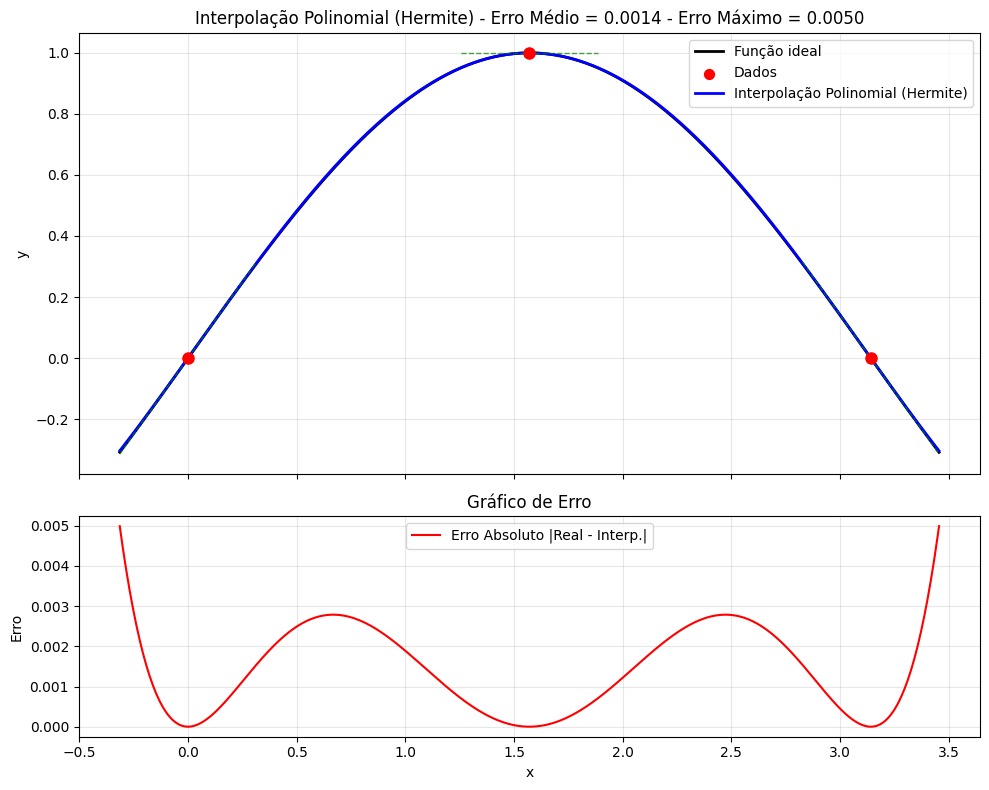

         x |         P(x) |       sen(x) |         erro
-------------------------------------------------------
    0.7854 |     0.709762 |     0.707107 | 2.655374e-03
    2.3562 |     0.709762 |     0.707107 | 2.655374e-03
   -1.0000 |    -0.713681 |    -0.841471 | 1.277897e-01
    4.0000 |    -0.677372 |    -0.756802 | 7.943017e-02

EXEMPLO 2: Função quadrática

Erro médio absoluto: 0.000000e+00
Erro máximo absoluto: 0.000000e+00


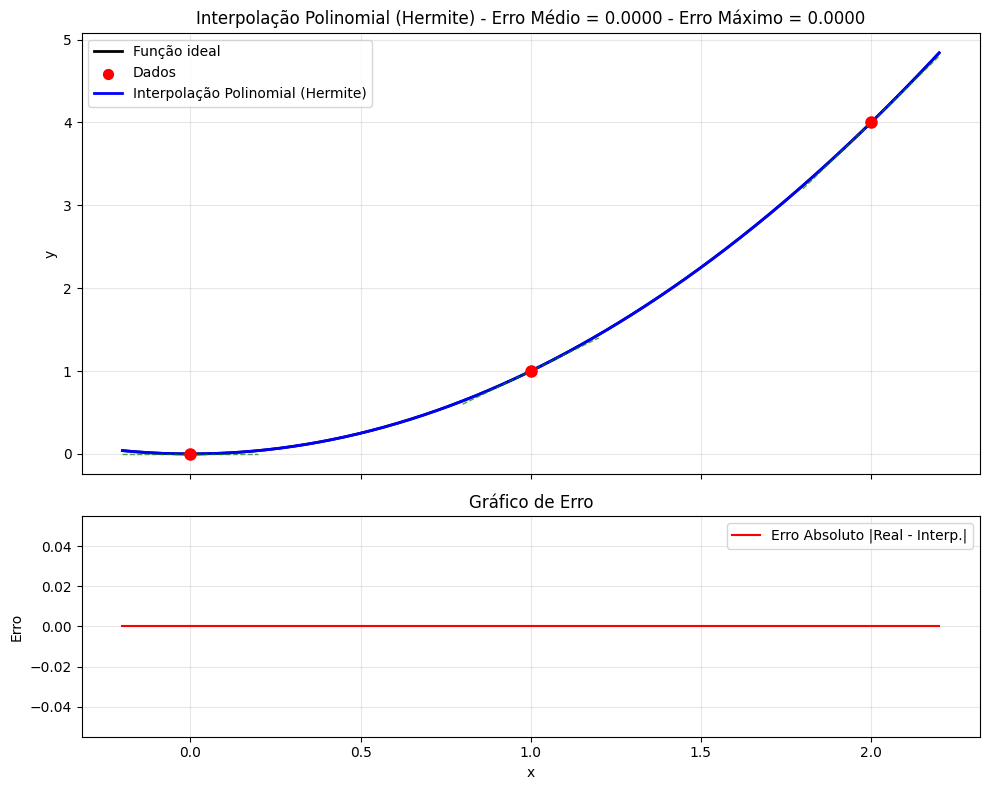

         x |         P(x) |           x² |         erro
-------------------------------------------------------
   -1.0000 |     1.000000 |     1.000000 | 0.000000e+00
    0.5000 |     0.250000 |     0.250000 | 0.000000e+00
    1.5000 |     2.250000 |     2.250000 | 0.000000e+00
    3.0000 |     9.000000 |     9.000000 | 0.000000e+00


In [8]:
print("EXEMPLO 1: Função sen(x)\n")

# Função real e derivada
def f_real1(x): return np.sin(x)
def f_real1_deriv(x): return np.cos(x)

# Dados de interpolação
x1 = [0, np.pi/2, np.pi]
y1 = [f_real1(x) for x in x1]
dy1 = [f_real1_deriv(x) for x in x1]

# Cria e plota o polinômio de Hermite
p1 = hermite_interp(
    x1, y1, dy1,
    f_real=f_real1,
    titulo="Interpolação de Hermite - f(x)=sen(x)",
    plot=True
)

# Testes (incluindo extrapolação)
if p1:
    xs_teste = [np.pi/4, 3*np.pi/4, -1, 4]

    print(f"{'x':>10} | {'P(x)':>12} | {'sen(x)':>12} | {'erro':>12}")
    print("-" * 55)

    for x in xs_teste:
        interp = p1(x)
        real = f_real1(x)
        erro = abs(interp - real)
        print(f"{x:10.4f} | {interp:12.6f} | {real:12.6f} | {erro:12.6e}")



print("\nEXEMPLO 2: Função quadrática\n")

# Função real e derivada
def f_real2(x): return x**2
def f_real2_deriv(x): return 2*x

# Dados de interpolação
x2 = [0, 1, 2]
y2 = [f_real2(x) for x in x2]
dy2 = [f_real2_deriv(x) for x in x2]

# Cria e plota o polinômio
p2 = hermite_interp(
    x2, y2, dy2,
    f_real=f_real2,
    titulo="Interpolação de Hermite - f(x)=x²",
    plot=True
)

# Testes (incluindo extrapolação)
if p2:
    xs_teste = [-1, 0.5, 1.5, 3]

    print(f"{'x':>10} | {'P(x)':>12} | {'x²':>12} | {'erro':>12}")
    print("-" * 55)

    for x in xs_teste:
        interp = p2(x)
        real = f_real2(x)
        erro = abs(interp - real)
        print(f"{x:10.4f} | {interp:12.6f} | {real:12.6f} | {erro:12.6e}")

In [5]:
# Neses exemplos basta vc ter os pontos, o valor nos pontos e suas derivadas que conseguimpos interpolar, diferente do exemplo anterior que já usava uma função pronta
print("EXEMPLO 2 — Interpolação com 3 pontos")

x = [0, 1, 2]
y = [0, 1, 0]
dy = [1, 0, -1]

# Se quiser ver o plot, só colocar =True
p = hermite_interp(x, y, dy, titulo="Hermite simples", plot=False)

# Aqui mesmo fora do intervalo dos pontos dados conseguimos interpolar pq nossa biblioteca permite extrapolação automática
xs_teste = [0, 0.5, 1, 1.5, 2, 3]

print("x\tP(x)")
print("-" * 14)
for xi in xs_teste:
    print(f"{xi:.2f}\t{p(xi):.4f}")

EXEMPLO 2 — Interpolação com 3 pontos
x	P(x)
--------------
0.00	0.0000
0.50	0.6562
1.00	1.0000
1.50	0.6562
2.00	0.0000
3.00	3.0000


In [6]:
print("EXEMPLO 3 — Curva decrescente com mínimo")

x = [0, 1, 2]
y = [3, 1, 2]
dy = [-1, 0, 1]

p = hermite_interp(x, y, dy, titulo="Hermite - mínimo central", plot=False)

xs_teste = [0, 0.5, 1, 1.5, 2]
print("x\tP(x)")
print("-" * 14)
for xi in xs_teste:
    print(f"{xi:.2f}\t{p(xi):.4f}")

EXEMPLO 3 — Curva decrescente com mínimo
x	P(x)
--------------
0.00	3.0000
0.50	1.6953
1.00	1.0000
1.50	1.4297
2.00	2.0000
